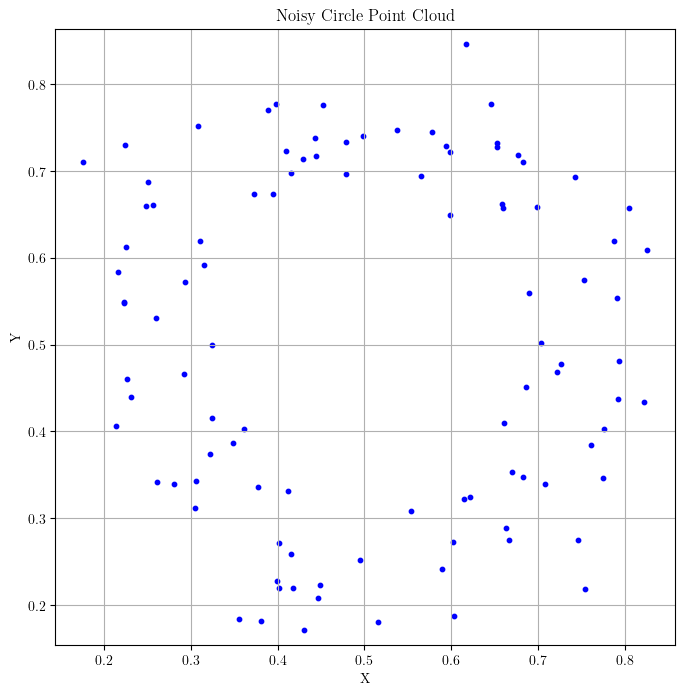

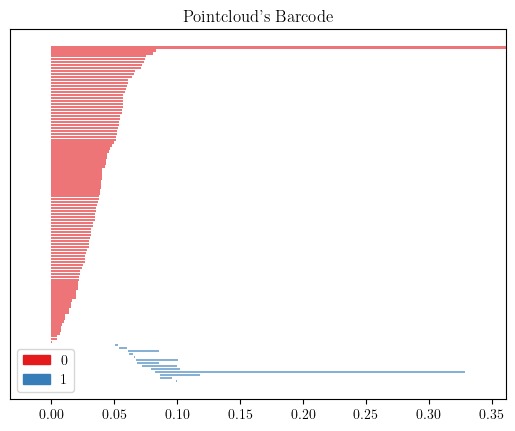

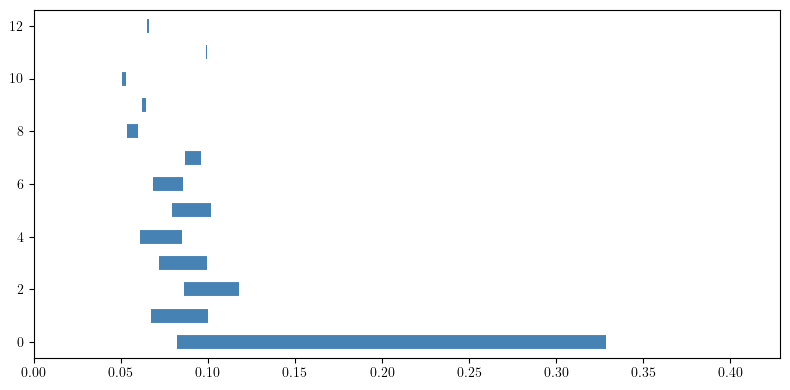

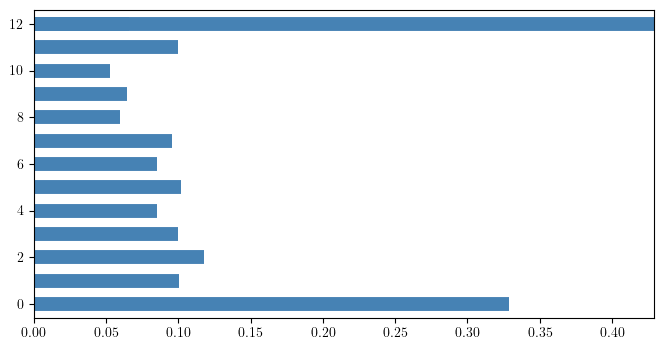

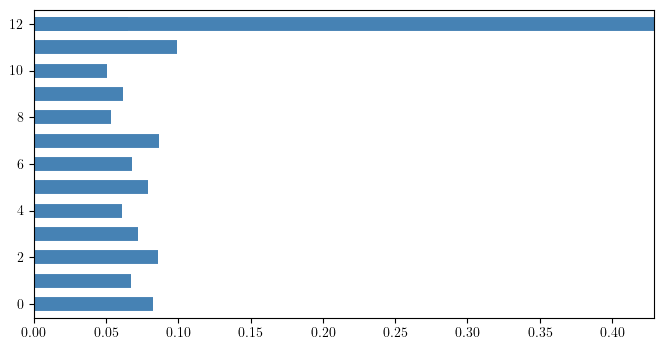

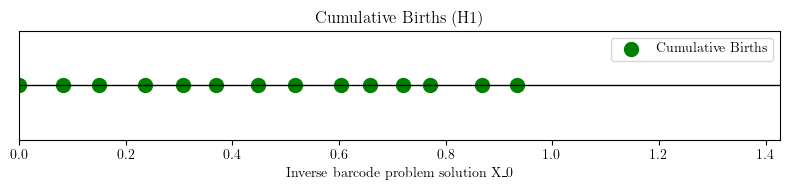

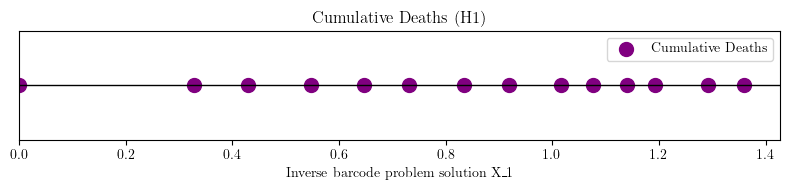

Inverse barcode problem solution X_0 [0.         0.08231514 0.14959482 0.23581218 0.30803434 0.36900613
 0.44846321 0.51686192 0.60364243 0.65742649 0.71956152 0.77038877
 0.86928074 0.93469511]
Inverse barcode problem solution X_1: [0.         0.32863348 0.42900004 0.54690613 0.64673519 0.73201159
 0.83406104 0.91972856 1.01563425 1.07561804 1.14025847 1.19312963
 1.29295719 1.35908684]


In [27]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi import RipsComplex
import numpy as np
import matplotlib.pyplot as plt


# Parameters
radius = 0.25
center = np.array([0.5, 0.5])
num_points = 100  # Total number of points
noise_level = 0.05  # Amount of noise to add

# Generate points on a perfect circle
angles = np.linspace(0, 2*np.pi, num_points, endpoint=False)
x = center[0] + radius * np.cos(angles)
y = center[1] + radius * np.sin(angles)
perfect_circle = np.column_stack((x, y))

# Add Gaussian noise to make it a noisy circle
noisy_circle = perfect_circle + np.random.normal(scale=noise_level, size=(num_points, 2))

# Plot the points
plt.figure(figsize=(8, 8))
plt.scatter(noisy_circle[:, 0], noisy_circle[:, 1], s=10, c='blue')
plt.title('Noisy Circle Point Cloud')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio equal
plt.show()

# Crear complejo de Rips
rips_complex = gd.RipsComplex(points=noisy_circle, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Calcular persistencia
simplex_tree.compute_persistence()

# Graficar el barcode de persistencia
gd.plot_persistence_barcode(simplex_tree.persistence())
plt.title("Pointcloud's Barcode")
plt.show()
# Extraer los pares de nacimiento y muerte de la persistencia
persistence = simplex_tree.persistence()

finite_deaths = [death for (dim, (birth, death)) in persistence if np.isfinite(death)]
max_filtration = max(finite_deaths) + 0.1 if finite_deaths else 0.5


# Extraer características de dimensión 1 (ciclos)
dim_1_pairs = [pair[1] for pair in persistence if pair[0] == 1]
bd_array = np.array(dim_1_pairs)

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
for i, (birth, death) in enumerate(bd_array):
    plt.hlines(y=i, xmin=birth, xmax=death, color='steelblue', linewidth=10)
plt.xlim(0, max_filtration)
plt.tight_layout()
plt.show()

# Graficar solo la barcode de dimensión 1 (horizontal)
plt.figure(figsize=(8, 4))
plt.hlines(y=12, xmin=0, xmax=70, color='steelblue', linewidth=10)
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=death, color='steelblue', linewidth=10)
plt.figure(figsize=(8, 4))
plt.hlines(y=12, xmin=0, xmax=70, color='steelblue', linewidth=10)
for i, (birth, death) in enumerate(bd_array):
    # Start the bars at 0 instead of 'birth'
    plt.xlim(0, max_filtration)
    plt.hlines(y=i, xmin=0, xmax=birth, color='steelblue', linewidth=10)
    
# Cálculo de suma acumulativa de birth y death de los ciclos H1
if dim_1_pairs:
    births = [birth for (birth, death) in dim_1_pairs]
    deaths = [death if np.isfinite(death) else max_filtration for (birth, death) in dim_1_pairs]

    # Añadir el 0 al principio
    births = [0] + births
    deaths = [0] + deaths

    # Sumas acumulativas
    cumulative_births = np.cumsum(births)
    cumulative_deaths = np.cumsum(deaths)

    # Puntos 2D para graficar como una línea real 1D
    birth_points_2d = np.array([[x, 0] for x in cumulative_births])
    death_points_2d = np.array([[x, 0] for x in cumulative_deaths])

    # Definir límites comunes para el eje X
    x_max = max(cumulative_births[-1], cumulative_deaths[-1])
    x_lim = (0, x_max * 1.05)  # Un pequeño margen a la derecha

    # Gráfico de puntos acumulados de birth
    plt.figure(figsize=(8, 2))
    plt.scatter(birth_points_2d[:, 0], birth_points_2d[:, 1], color='green', s=100, label='Cumulative Births')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Inverse barcode problem solution X_0")
    plt.title("Cumulative Births (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Gráfico de puntos acumulados de death
    plt.figure(figsize=(8, 2))
    plt.scatter(death_points_2d[:, 0], death_points_2d[:, 1], color='purple', s=100, label='Cumulative Deaths')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Inverse barcode problem solution X_1")
    plt.title("Cumulative Deaths (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Imprimir resultados
    print("Inverse barcode problem solution X_0", cumulative_births)
    print("Inverse barcode problem solution X_1:", cumulative_deaths)



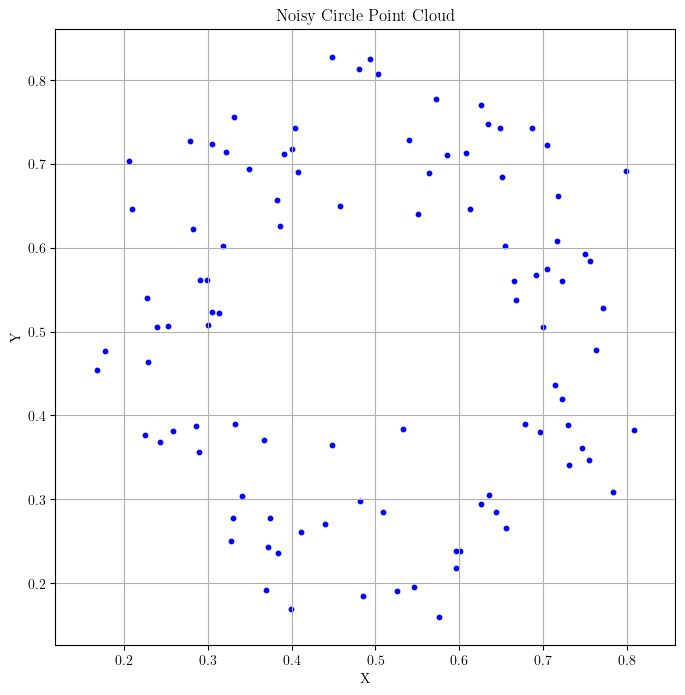

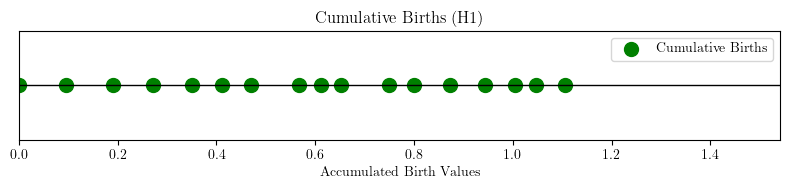

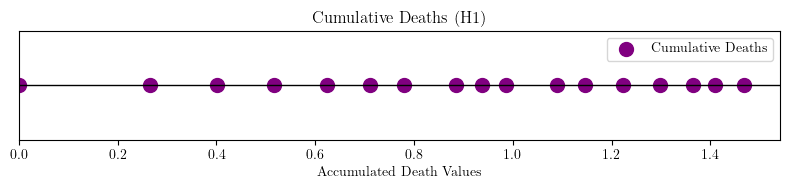

Inverse barcode problem solution X_0 [0.         0.09522298 0.18990872 0.27233937 0.34951609 0.41155207
 0.47021422 0.56654141 0.61121054 0.65246334 0.74925141 0.79941463
 0.87301403 0.94305375 1.00528124 1.04646679 1.10523289]
Inverse barcode problem solution X_1: [0.         0.26551687 0.40190298 0.51654278 0.62397229 0.71020047
 0.7791811  0.88484828 0.93848572 0.98633061 1.08922617 1.14511229
 1.22379715 1.29868345 1.36535634 1.40844383 1.4673798 ]


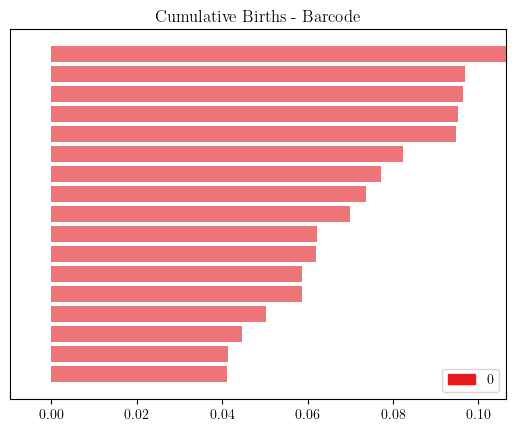


Cumulative Births - Persistence Intervals:
Dim 0: Birth = 0.0000, Death = ∞
Dim 0: Birth = 0.0000, Death = 0.09678806985550359
Dim 0: Birth = 0.0000, Death = 0.09632718948097185
Dim 0: Birth = 0.0000, Death = 0.09522298217405681
Dim 0: Birth = 0.0000, Death = 0.09468573646356812
Dim 0: Birth = 0.0000, Death = 0.08243065631296487
Dim 0: Birth = 0.0000, Death = 0.07717671200800258
Dim 0: Birth = 0.0000, Death = 0.07359940251210906
Dim 0: Birth = 0.0000, Death = 0.07003971495835903
Dim 0: Birth = 0.0000, Death = 0.06222749801509875
Dim 0: Birth = 0.0000, Death = 0.06203598122837678
Dim 0: Birth = 0.0000, Death = 0.05876609646584052
Dim 0: Birth = 0.0000, Death = 0.05866215537378755
Dim 0: Birth = 0.0000, Death = 0.05016321468591045
Dim 0: Birth = 0.0000, Death = 0.04466912481665397
Dim 0: Birth = 0.0000, Death = 0.041252806294800326
Dim 0: Birth = 0.0000, Death = 0.04118554499082183


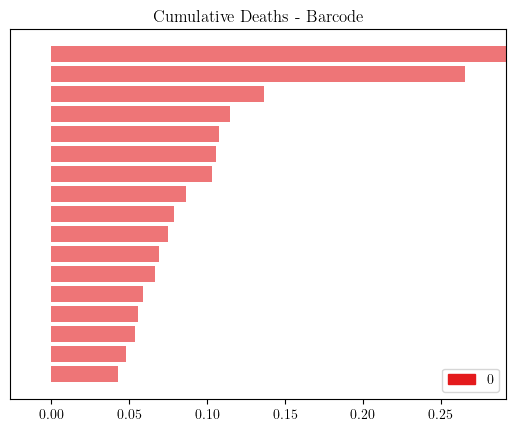


Cumulative Deaths - Persistence Intervals:
Dim 0: Birth = 0.0000, Death = ∞
Dim 0: Birth = 0.0000, Death = 0.26551687072067315
Dim 0: Birth = 0.0000, Death = 0.1363861050870206
Dim 0: Birth = 0.0000, Death = 0.11463980209035296
Dim 0: Birth = 0.0000, Death = 0.10742950725823586
Dim 0: Birth = 0.0000, Death = 0.10566717711175211
Dim 0: Birth = 0.0000, Death = 0.10289556229271835
Dim 0: Birth = 0.0000, Death = 0.08622818867518489
Dim 0: Birth = 0.0000, Death = 0.07868486307415212
Dim 0: Birth = 0.0000, Death = 0.07488630302076271
Dim 0: Birth = 0.0000, Death = 0.06898062914187031
Dim 0: Birth = 0.0000, Death = 0.06667288963386842
Dim 0: Birth = 0.0000, Death = 0.058935970505426205
Dim 0: Birth = 0.0000, Death = 0.05588611565190216
Dim 0: Birth = 0.0000, Death = 0.05363743830862544
Dim 0: Birth = 0.0000, Death = 0.047844890647113725
Dim 0: Birth = 0.0000, Death = 0.04308749000052714


RuntimeError: latex was not able to process the following string:
b'Cumulative Births - H1 Barcode with \\u221e Bar'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpioz0itk6 caf501333d608c5809509317c717315d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(caf501333d608c5809509317c717315d.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-07-20>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2024/02/08 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/firstaid\underscore-ltx.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file caf501333d608c5809509317c717315d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ∞ (U+221E)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...ly Cumulative Births - H1 Barcode with ∞
                                                   Bar}%
No pages of output.
Transcript written on C:\Users\marki\.matplotlib\tex.cache\ca\f5\tmpioz0itk6\ca
f501333d608c5809509317c717315d.log.
latex: major issue: So far, no MiKTeX administrator has checked for updates.




Error in callback <function _draw_all_if_interactive at 0x000001D821706FC0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'Cumulative Births - H1 Barcode with \\u221e Bar'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmppcpwmce2 caf501333d608c5809509317c717315d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(caf501333d608c5809509317c717315d.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-07-20>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2024/02/08 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/firstaid\underscore-ltx.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file caf501333d608c5809509317c717315d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ∞ (U+221E)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...ly Cumulative Births - H1 Barcode with ∞
                                                   Bar}%
No pages of output.
Transcript written on C:\Users\marki\.matplotlib\tex.cache\ca\f5\tmppcpwmce2\ca
f501333d608c5809509317c717315d.log.
latex: major issue: So far, no MiKTeX administrator has checked for updates.




RuntimeError: latex was not able to process the following string:
b'Cumulative Births - H1 Barcode with \\u221e Bar'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpcstb6ga2 caf501333d608c5809509317c717315d.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (MiKTeX 24.4) (preloaded format=latex.fmt)
 restricted \write18 enabled.
entering extended mode
(caf501333d608c5809509317c717315d.tex
LaTeX2e <2024-06-01> patch level 2
L3 programming layer <2024-07-20>
(C:\Program Files\MiKTeX\tex/latex/base\article.cls
Document Class: article 2024/02/08 v1.4n Standard LaTeX document class
(C:\Program Files\MiKTeX\tex/latex/base\size10.clo))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/type1cm\type1cm.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/cm-super\type1ec.sty
(C:\Program Files\MiKTeX\tex/latex/base\t1cmr.fd))
(C:\Program Files\MiKTeX\tex/latex/base\inputenc.sty)
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.sty
(C:\Program Files\MiKTeX\tex/latex/graphics\keyval.sty)
(C:\Program Files\MiKTeX\tex/generic/iftex\ifvtex.sty
(C:\Program Files\MiKTeX\tex/generic/iftex\iftex.sty))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/geometry\geometry.cfg))
(C:\Users\marki\AppData\Roaming\MiKTeX\tex/latex/underscore\underscore.sty)
(C:\Program Files\MiKTeX\tex/latex/firstaid\underscore-ltx.sty)
(C:\Program Files\MiKTeX\tex/latex/base\textcomp.sty)
(C:\Program Files\MiKTeX\tex/latex/l3backend\l3backend-dvips.def)
No file caf501333d608c5809509317c717315d.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character ∞ (U+221E)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.29 ...ly Cumulative Births - H1 Barcode with ∞
                                                   Bar}%
No pages of output.
Transcript written on C:\Users\marki\.matplotlib\tex.cache\ca\f5\tmpcstb6ga2\ca
f501333d608c5809509317c717315d.log.
latex: major issue: So far, no MiKTeX administrator has checked for updates.




<Figure size 800x400 with 1 Axes>

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi as gd
from gudhi import RipsComplex

# Parameters for the noisy circle
radius = 0.25
center = np.array([0.5, 0.5])
num_points = 100  # Total number of points
noise_level = 0.05  # Amount of noise to add

# Generate points on a perfect circle
angles = np.linspace(0, 2 * np.pi, num_points, endpoint=False)
x = center[0] + radius * np.cos(angles)
y = center[1] + radius * np.sin(angles)
perfect_circle = np.column_stack((x, y))

# Add Gaussian noise to make it a noisy circle
noisy_circle = perfect_circle + np.random.normal(scale=noise_level, size=(num_points, 2))

# Plot the noisy circle
plt.figure(figsize=(8, 8))
plt.scatter(noisy_circle[:, 0], noisy_circle[:, 1], s=10, c='blue')
plt.title('Noisy Circle Point Cloud')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.axis('equal')  # Keep aspect ratio equal
plt.show()

# Create Rips complex and compute persistence
rips_complex = gd.RipsComplex(points=noisy_circle, max_edge_length=2.0)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)

# Compute persistence
simplex_tree.compute_persistence()

# Extract persistence intervals for H1 (dimension 1)
persistence = simplex_tree.persistence()
finite_deaths = [death for (dim, (birth, death)) in persistence if np.isfinite(death)]
max_filtration = max(finite_deaths) + 0.1 if finite_deaths else 0.5

# Extract birth and death pairs for dimension 1 (cycles)
dim_1_pairs = [pair[1] for pair in persistence if pair[0] == 1]
bd_array = np.array(dim_1_pairs)

# Calculate cumulative sums for births and deaths
if dim_1_pairs:
    births = [birth for (birth, death) in dim_1_pairs]
    deaths = [death if np.isfinite(death) else max_filtration for (birth, death) in dim_1_pairs]

    # Add the 0 at the beginning
    births = [0] + births
    deaths = [0] + deaths

    # Cumulative sums
    cumulative_births = np.cumsum(births)
    cumulative_deaths = np.cumsum(deaths)

    # Points 2D for plotting as 1D real line
    birth_points_2d = np.array([[x, 0] for x in cumulative_births])
    death_points_2d = np.array([[x, 0] for x in cumulative_deaths])

    # Define common limits for X axis
    x_max = max(cumulative_births[-1], cumulative_deaths[-1])
    x_lim = (0, x_max * 1.05)  # A small margin to the right

    # Plot accumulated birth points
    plt.figure(figsize=(8, 2))
    plt.scatter(birth_points_2d[:, 0], birth_points_2d[:, 1], color='green', s=100, label='Cumulative Births')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Accumulated Birth Values")
    plt.title("Cumulative Births (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Plot accumulated death points
    plt.figure(figsize=(8, 2))
    plt.scatter(death_points_2d[:, 0], death_points_2d[:, 1], color='purple', s=100, label='Cumulative Deaths')
    plt.axhline(0, color='black', linewidth=1)
    plt.yticks([])
    plt.xlim(x_lim)
    plt.xlabel("Accumulated Death Values")
    plt.title("Cumulative Deaths (H1)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print results
    print("Inverse barcode problem solution X_0", cumulative_births)
    print("Inverse barcode problem solution X_1:", cumulative_deaths)

# Create Rips complexes for both cumulative birth and death points and plot persistence barcode
for name, points in [("Cumulative Births", birth_points_2d), ("Cumulative Deaths", death_points_2d)]:
    # Create Rips complex
    rips_complex = gd.RipsComplex(points=points, max_edge_length=1.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

    # Plot persistence barcode
    gd.plot_persistence_barcode(simplex_tree.persistence())
    plt.title(f"{name} - Barcode")
    plt.show()

    # Extract birth-death pairs
    persistence = simplex_tree.persistence()
    finite_deaths = [death for (dim, (birth, death)) in persistence if np.isfinite(death)]
    max_filtration = max(finite_deaths) + 0.1 if finite_deaths else 0.5

    print(f"\n{name} - Persistence Intervals:")
    for dim, (birth, death) in persistence:
        print(f"Dim {dim}: Birth = {birth:.4f}, Death = {death if np.isfinite(death) else '∞'}")

# Plot barcode diagrams for births and deaths with the same x-axis scale
for name, points in [("Cumulative Births", birth_points_2d), ("Cumulative Deaths", death_points_2d)]:
    # Create Rips complex
    rips_complex = gd.RipsComplex(points=points, max_edge_length=1.0)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    persistence = simplex_tree.persistence()
    
    # Extract dimension 1 (cycles) persistence pairs
    dim_1_pairs = [pair[1] for pair in persistence if pair[0] == 1]
    bd_array = np.array(dim_1_pairs)

    plt.figure(figsize=(8, 4))
    for i, (birth, death) in enumerate(bd_array):
        plt.hlines(y=i, xmin=birth, xmax=death, color='steelblue', linewidth=10)

    # Add line that goes beyond the max_filtration
    plt.hlines(y=len(bd_array), xmin=0, xmax=max_filtration * 1.1, color='darkred', linewidth=10, label='∞ persistence')

    plt.xlim(0, max_filtration * 1.1)
    plt.title(f"{name} - H1 Barcode with ∞ Bar")
    plt.xlabel("Filtration Value")
    plt.legend()
    plt.tight_layout()
    plt.show()
